In [1]:
import pyEpiabm as pe
from pyEpiabm.sweep import InitialHouseholdSweep
from pyEpiabm.core import Population, Parameters
import os

In [2]:
pe.Parameters.set_file("simple_parameters_with_age.json")
pop = Population()
pop.add_cells(1)
cell = pop.cells[0]
cell.add_microcells(1)
microcell = cell.microcells[0]

In [3]:
microcell.add_people(1000000)

In [4]:
sweep = InitialHouseholdSweep()
sweep.bind_population(pop)
sweep()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

ages = np.zeros(len(microcell.persons))

for i in range(len(ages)):
    ages[i] = microcell.persons[i].age

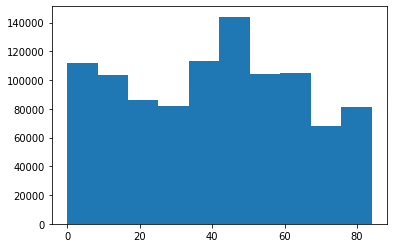

In [6]:
plt.hist(ages)
plt.show()

[61810 56078 58149 63187 68221 68388 64778 66325 72653 72275 64805 57432
 59953 48124 38650 31759 47413]


<BarContainer object of 17 artists>

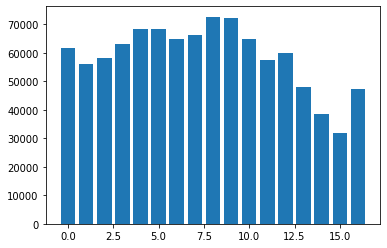

In [7]:
age_props = pe.Parameters.instance().age_proportions
q = age_props/100
split = np.random.multinomial(len(microcell.persons), q)
print(split)

plt.bar(range(len(split)), split)